In [2]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

# import corner 
# # matplotlib.use('TkAgg')
%matplotlib inline

### In all the cases, we use multi mode in dynesty with dlogz=0.01 as stopping criterion.

In [4]:
dir_name = '/home/isidro/Documents/github/simplemc_tests/simplemc/chains/'


## PC: LCDM HD+SN, 4 proc, 500 live points. (more updated method)

In [5]:
roots1 = ['LCDM_phy_HD+SN_nested_multi',
         'LCDM_phy_HD+SN_nested_multi_neuralike',
         'LCDM_phy_HD+SN_nested_multi_neuralike_genetic',
         'LCDM_phy_HD+SN_nested_multi_genetic',]

<Figure size 720x648 with 0 Axes>

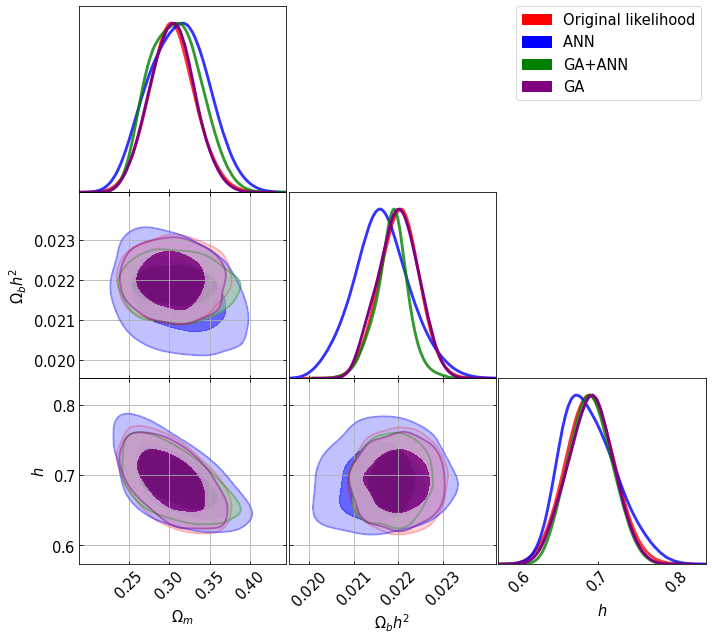

In [11]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots1, ['Om','Obh2', 'h'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood', 
                               'ANN ', 
                               'GA+ANN', 'GA'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
# g.subplots[3,0].grid(True)
# g.subplots[3,1].grid(True)]
# g.subplots[3,2].grid(True)

# g.add_text('CPL with curvature \n\nHD+BAO+Pantheon', x= -0.5, y=2.8, fontsize=13)
# g.add_text('CPL with curvature \n\nHD+BAO+Pantheon', x= 0.3, y=1.8, fontsize=13)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.grid()
# plt.savefig('owacdm_neuralike.png', dpi=300)
# plt.savefig('olcdm_neuralike.png', dpi=300)

## PC: LCDM with Pantheon, 4 proc, 500 live points

In [13]:
roots2 = ['LCDM_phy_Pantheon_nested_multi',
          'LCDM_phy_Pantheon_nested_multi_neuralike',
          'LCDM_phy_Pantheon_nested_multi_neuralike_genetic',]
#          'LCDM_phy_HD+SN_nested_multi_genetic',]

<Figure size 720x648 with 0 Axes>

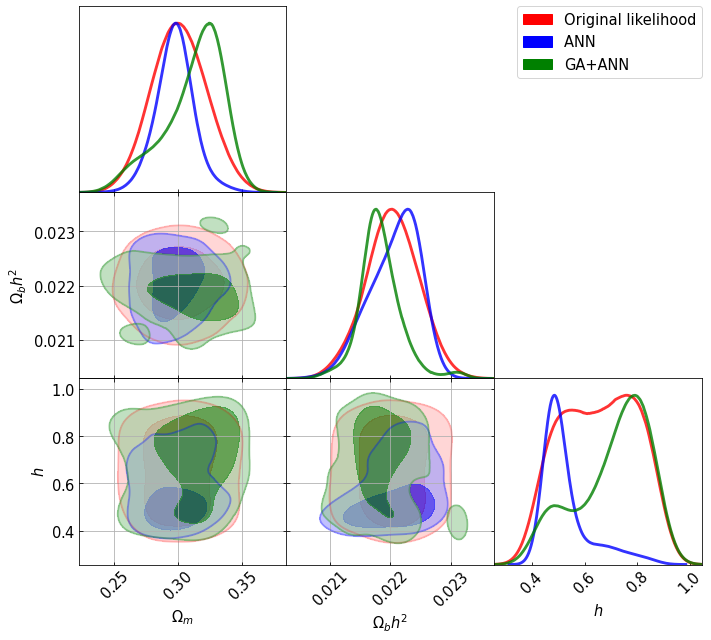

In [14]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','Obh2', 'h'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood', 
                               'ANN ', 
                               'GA+ANN', 'GA'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)


## SERVER: waCDM CBAO+Pantheon+HD, 8 proc, 1000 live points. (without dead points and without stopping criterion in trainning)

In [9]:
roots3 = ['waCDM_phy_CBAO+Pantheon+HD_nested_multi',
          'waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike',
          'waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike_genetic',]
#          'LCDM_phy_HD+SN_nested_multi_genetic',]

/home/isidro/Documents/github/simplemc_tests/simplemc/chains/waCDM_phy_CBAO+Pantheon+HD_nested_multi_1.txt
Removed 0.2 as burn in
/home/isidro/Documents/github/simplemc_tests/simplemc/chains/waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike_1.txt
Removed 0.2 as burn in
/home/isidro/Documents/github/simplemc_tests/simplemc/chains/waCDM_phy_CBAO+Pantheon+HD_nested_multi_neuralike_genetic_1.txt
Removed 0.2 as burn in


<Figure size 720x648 with 0 Axes>

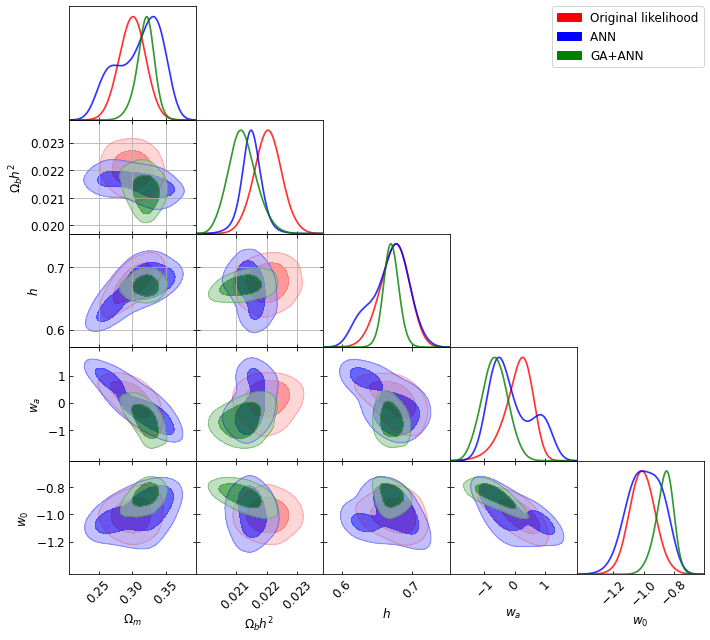

In [10]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.2})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots3, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood', 
                               'ANN ', 
                               'GA+ANN', 'GA'],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)